In [53]:
import pandas as pd
import numpy as np
import zipfile
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
import zipfile

zip_path = "/Users/arul/Downloads/individual+household+electric+power+consumption.zip"  # Replace with actual ZIP filename
extract_path = "extracted_data"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)

# List extracted files
import os
file_list = os.listdir(extract_path)
print("Extracted Files:", file_list)


Extracted Files: ['household_power_consumption.txt']


In [3]:
import os

extract_path = "extracted_data"
print(os.listdir(extract_path))  # This will print the actual filename


['household_power_consumption.txt']


In [79]:
import pandas as pd

# Replace 'your_file.txt' with the actual filename
file_path = "extracted_data/household_power_consumption.txt"  


# Read the text file and convert it to CSV
df = pd.read_csv(file_path, delimiter=",")  # Change delimiter if needed
df.to_csv("converted_file.csv", index=False)

print("TXT file converted to CSV successfully!")


In [78]:
# Read the text file with ';' as separator
df = pd.read_csv("extracted_data/household_power_consumption.txt", sep=';', engine='python')

# Save the DataFrame to a CSV file with proper formatting
df.to_csv("converted_file1.csv", index=False, sep=',')

print("File converted successfully to 'converted_file.csv'")

File converted successfully to 'converted_file.csv'


In [ ]:
df = pd.read_csv("converted_file.csv", delimiter= ';')
df.head()


In [7]:
# Check the Data Structure

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [8]:
# Display Basic Statistics

df.describe()


,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [9]:
# Check for Missing Values

df.isnull().sum()


Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [10]:
# Display Column Names

df.columns


Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [11]:
# Check for Duplicate Rows

df.duplicated().sum()


0

In [12]:
# total number of rows

df.shape  # Returns (rows, columns)


(2075259, 9)

In [13]:
# Fill with Median (Best for Skewed Data)

df['Sub_metering_3'].fillna(df['Sub_metering_3'].median(), inplace=True)


In [14]:
# Verify Missing Values Are Filled

print(df['Sub_metering_3'].isnull().sum())  # Should print 0


0


In [15]:
# Check for Any Remaining Missing Data

df.isnull().sum()


Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [16]:
# Convert Date & Time to Separate Features

# Check if ‘Date’ or ‘Datetime’ Column Exists

df.columns


Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [17]:
# Convert to DateTime Format 

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [18]:
# Extract Useful Time Features

#new columns from Datetime:

df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['Weekday'] = df['Datetime'].dt.weekday  # 0 = Monday, 6 = Sunday
df['Weekend'] = (df['Weekday'] >= 5).astype(int)  # 1 for Saturday/Sunday


In [19]:
# Create Rolling Average Features

df['Rolling_Mean_3hr'] = df['Sub_metering_3'].rolling(window=3).mean()
df['Rolling_Mean_6hr'] = df['Sub_metering_3'].rolling(window=6).mean()


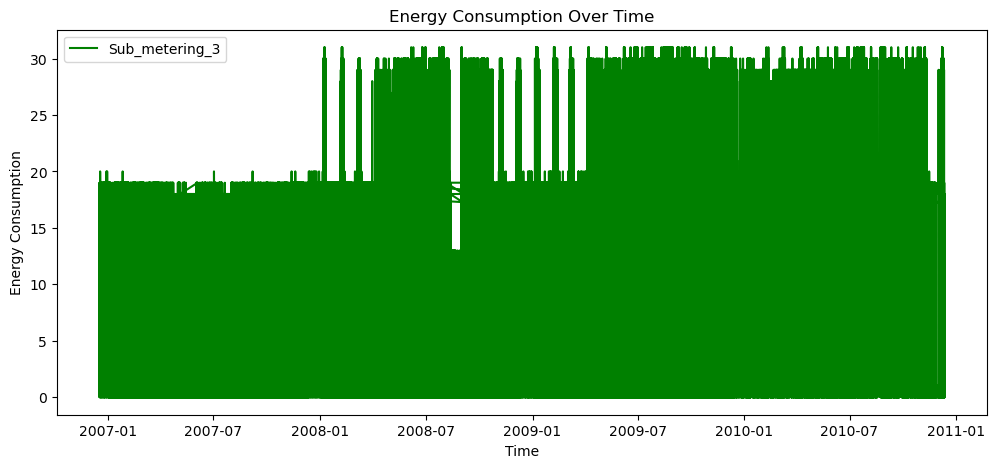

In [20]:
# Exploratory Data Analysis (EDA)

# Visualize Overall Energy Consumption Trends

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['Datetime'], df['Sub_metering_3'], color='green', label='Sub_metering_3')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.legend()
plt.show()

# This helps identify patterns like peaks or drops in usage.

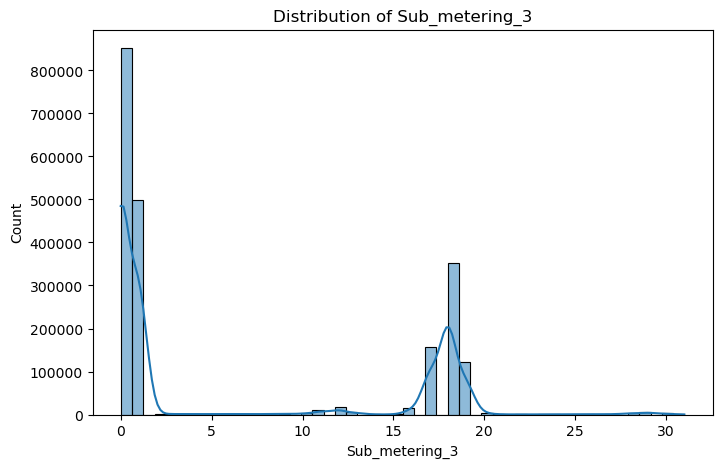

In [21]:
# Check Distribution of Energy Usage

import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Sub_metering_3'], bins=50, kde=True)
plt.title('Distribution of Sub_metering_3')
plt.show()

# This shows whether energy consumption is normally distributed or skewed.

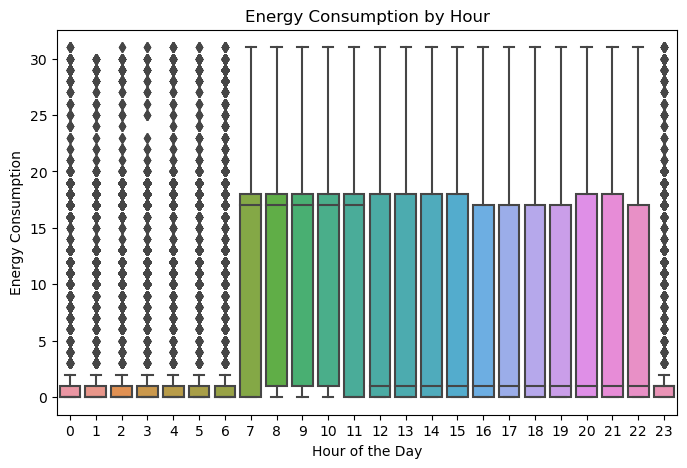

In [22]:
# Compare Energy Consumption by Hour

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Hour'], y=df['Sub_metering_3'])
plt.xlabel("Hour of the Day")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption by Hour")
plt.show()

# Helps detect when peak energy usage happens.

/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_28423/1167453032.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


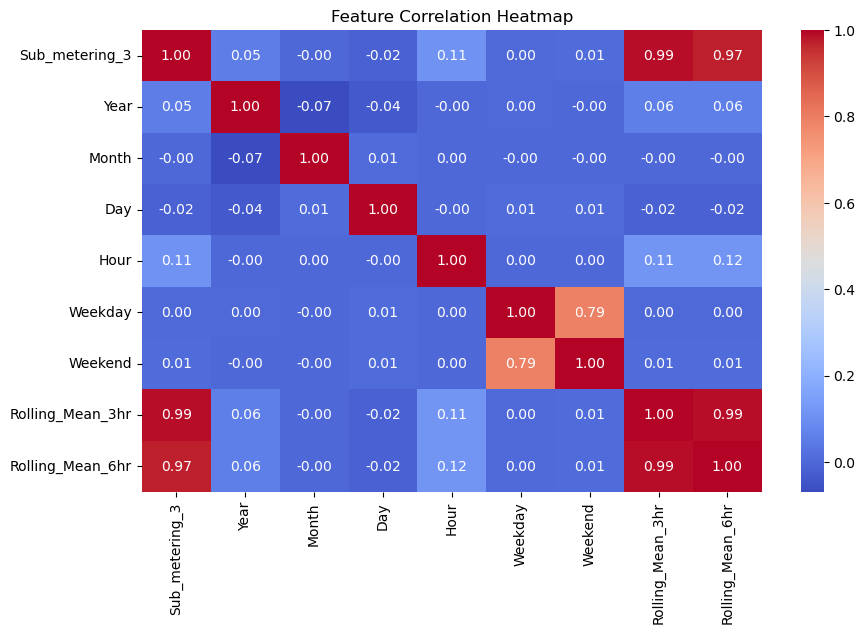

In [23]:
# Find Correlations Between Features

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Tells us which features are most related to energy consumption.


In [24]:
# data preparation for machine learning.

# Prepare Data for Model Training (need to select relevant features, split the data, and scale it for better performance)

# Select Features & Target Variable

# Define features (X) and target variable (y)
X = df[['Hour', 'Weekday', 'Month', 'Rolling_Mean_3hr', 'Rolling_Mean_6hr']]  # Select relevant features
y = df['Sub_metering_3']  # Target variable




In [25]:
# Split Data into Training & Testing Sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)

# We train the model on 80% of the data and test it on 20%.

Training Set Size: (1660207, 5)
Testing Set Size: (415052, 5)


In [26]:
# Scale the Features (If Needed)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensures all features are on a similar scale, improving model accuracy.


In [27]:
# Model selection and training

# Train Regression Models

In [28]:
import numpy as np

print("Missing values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("Missing values in X_test_scaled:", np.isnan(X_test_scaled).sum())


Missing values in X_train_scaled: 6
Missing values in X_test_scaled: 1


In [29]:
print(X.isnull().sum())


Hour                0
Weekday             0
Month               0
Rolling_Mean_3hr    2
Rolling_Mean_6hr    5
dtype: int64


In [30]:
X = df[['Hour', 'Weekday', 'Month', 'Rolling_Mean_3hr', 'Rolling_Mean_6hr']].copy()
X.fillna(X.median(), inplace=True)  # Now it works safely


In [31]:
X.fillna(X.median(), inplace=True)


In [32]:
print(X.isnull().sum())


Hour                0
Weekday             0
Month               0
Rolling_Mean_3hr    0
Rolling_Mean_6hr    0
dtype: int64


In [38]:
# Train a Simple Linear Regression Model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Re-split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Re-split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [41]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_lr)
rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Performance:\nMAE: {mae:.3f}\nRMSE: {rmse:.3f}\nR² Score: {r2:.3f}")


Linear Regression Performance:
MAE: 0.475
RMSE: 1.060
R² Score: 0.984


In [42]:
# Train a Random Forest Model

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Performance:\nMAE: {mae_rf:.3f}\nRMSE: {rmse_rf:.3f}\nR² Score: {r2_rf:.3f}")

# Random Forest captures non-linear patterns better than Linear Regression.


Random Forest Performance:
MAE: 0.260
RMSE: 0.510
R² Score: 0.996


In [43]:
# Train a Gradient Boosting Model

from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_scaled, y_train)

y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Performance:\nMAE: {mae_gb:.3f}\nRMSE: {rmse_gb:.3f}\nR² Score: {r2_gb:.3f}")

#  Boosting models handle outliers and complex patterns effectively.


Gradient Boosting Performance:
MAE: 0.284
RMSE: 0.561
R² Score: 0.996


In [44]:
# Compare Model Performance

import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "MAE": [mae, mae_rf, mae_gb],
    "RMSE": [rmse, rmse_rf, rmse_gb],
    "R² Score": [r2, r2_rf, r2_gb]
})

print(results.sort_values(by="R² Score", ascending=False))

# The model with the highest R² score and lowest RMSE is the best.

               Model       MAE      RMSE  R² Score
1      Random Forest  0.260285  0.510495  0.996310
2  Gradient Boosting  0.283580  0.560784  0.995548
0  Linear Regression  0.474584  1.060185  0.984086


In [45]:
# Random Forest performed the best,fine-tune it with hyperparameter tuning for even better accuracy.

# Hyperparameter Tuning for Random Forest

In [47]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': np.arange(50, 200, 50),  # Randomly choose from 50, 100, 150
    'max_depth': np.arange(10, 30, 10),  # Randomly choose from 10, 20
    'min_samples_split': [2, 5, 10]
}

# Randomized search with 10 random combinations
random_search = RandomizedSearchCV(rf, param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)
best_rf = random_search.best_estimator_

# Hyperparameter tuning helps improve model performance by selecting the best settings automatically.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 20}


In [48]:
# Evaluate the Optimized Random Forest Model

# Make Predictions

# Predict using the optimized model
y_pred_best_rf = best_rf.predict(X_test_scaled)


In [49]:
# Evaluate the Model Performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_rf_best = mean_absolute_error(y_test, y_pred_best_rf)
rmse_rf_best = mean_squared_error(y_test, y_pred_best_rf, squared=False)
r2_rf_best = r2_score(y_test, y_pred_best_rf)

print(f"Optimized Random Forest Performance:\nMAE: {mae_rf_best:.3f}\nRMSE: {rmse_rf_best:.3f}\nR² Score: {r2_rf_best:.3f}")


Optimized Random Forest Performance:
MAE: 0.257
RMSE: 0.491
R² Score: 0.997


In [50]:
# Compare with the Initial Random Forest Model

results = pd.DataFrame({
    "Model": ["Random Forest (Before Tuning)", "Random Forest (After Tuning)"],
    "MAE": [mae_rf, mae_rf_best],
    "RMSE": [rmse_rf, rmse_rf_best],
    "R² Score": [r2_rf, r2_rf_best]
})

print(results.sort_values(by="R² Score", ascending=False))


                           Model       MAE      RMSE  R² Score
1   Random Forest (After Tuning)  0.256570  0.490904  0.996588
0  Random Forest (Before Tuning)  0.260285  0.510495  0.996310


In [ ]:
# Save the Model for Deployment

# save the trained model 

In [51]:
# Save the Optimized Model using Joblib

import joblib

# Save the best model
joblib.dump(best_rf, "powerpulse_rf_model.pkl")

# Save the scaler (needed for Streamlit)
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [52]:
# Test Loading the Model

# Load the saved model
loaded_model = joblib.load("powerpulse_rf_model.pkl")

# Load the scaler
loaded_scaler = joblib.load("scaler.pkl")

# Test prediction with first test sample
sample = X_test.iloc[0, :].values.reshape(1, -1)
sample_scaled = loaded_scaler.transform(sample)

predicted_value = loaded_model.predict(sample_scaled)
print(f"Predicted Energy Consumption: {predicted_value[0]:.3f}")


Predicted Energy Consumption: 0.712


/Users/arul/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Final Checklist for Jupyter Notebook

In [54]:
# Ensure No Missing Values Exist

print("Missing values in dataset:\n", df.isnull().sum())


Missing values in dataset:
 Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
Year                     0
Month                    0
Day                      0
Hour                     0
Weekday                  0
Weekend                  0
Rolling_Mean_3hr         2
Rolling_Mean_6hr         5
dtype: int64


In [55]:
# Fix Missing Values in Rolling_Mean_3hr & Rolling_Mean_6hr

#Fill Missing Values with Median (Recommended)

df['Rolling_Mean_3hr'].fillna(df['Rolling_Mean_3hr'].median(), inplace=True)
df['Rolling_Mean_6hr'].fillna(df['Rolling_Mean_6hr'].median(), inplace=True)


In [56]:
# Verify Missing Values Are Fixed

print("Missing values after filling:\n", df.isnull().sum())


Missing values after filling:
 Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
Year                     0
Month                    0
Day                      0
Hour                     0
Weekday                  0
Weekend                  0
Rolling_Mean_3hr         0
Rolling_Mean_6hr         0
dtype: int64


In [57]:
# Re-run Model Saving Steps

# Split Data Again
X = df[['Hour', 'Weekday', 'Month', 'Rolling_Mean_3hr', 'Rolling_Mean_6hr']]
y = df['Sub_metering_3']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Data Again
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain Best Model
best_rf.fit(X_train_scaled, y_train)

# Save Model & Scaler Again
import joblib
joblib.dump(best_rf, "powerpulse_rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and Scaler Updated & Saved!")


Model and Scaler Updated & Saved!


In [58]:
import os

print(os.path.exists("powerpulse_rf_model.pkl"))  # Should return True if the file exists
print(os.path.exists("scaler.pkl"))  # Check for the scaler file


True
True


In [59]:
import os

print("Model Path:", os.path.abspath("powerpulse_rf_model.pkl"))
print("Scaler Path:", os.path.abspath("scaler.pkl"))


Model Path: /Users/arul/powerpulse_rf_model.pkl
Scaler Path: /Users/arul/scaler.pkl


In [60]:
import pickle

# Save the model again
with open("/Users/arul/Documents/VASUKI/projects/powerpulse_rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Save the scaler again
with open("/Users/arul/Documents/VASUKI/projects/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Files saved successfully!")


Files saved successfully!


In [61]:
!ls /Users/arul/Documents/VASUKI/projects/


Household energy usage forecast phonepe
enev.py                         powerpulse_rf_model.pkl
healthcare_dataset              scaler.pkl
household_energy.py


In [62]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Retrain model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)  

# Save model
with open("powerpulse_rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Save scaler
scaler = StandardScaler()
scaler.fit(X_train)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [63]:
import sklearn
print(sklearn.__version__)



1.2.2


In [64]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Train model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)  

# Save model
with open("/Users/arul/Documents/VASUKI/projects/powerpulse_rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Save scaler
scaler = StandardScaler()
scaler.fit(X_train)
with open("/Users/arul/Documents/VASUKI/projects/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [65]:
print(X_train.shape[1])  # Number of features used in training
print(X_train.columns)  # Names of the features used


5
Index(['Hour', 'Weekday', 'Month', 'Rolling_Mean_3hr', 'Rolling_Mean_6hr'], dtype='object')


In [67]:
temp = 25.0  # Example temperature value
humidity = 50.0  # Example humidity value
appliances = 5  # Example number of appliances

input_data = [[temp, humidity, appliances]]  # Now, it should work
print(input_data)


[[25.0, 50.0, 5]]


In [69]:
import streamlit as st


In [70]:
# Simulating user inputs in Jupyter
temp = float(input("Enter Average Temperature (°C): "))
humidity = float(input("Enter Humidity (%): "))
appliances = int(input("Enter Number of Appliances: "))

input_data = [[temp, humidity, appliances]]
print("Input Data:", input_data)


Enter Average Temperature (°C): 33
Enter Humidity (%): 2.3
Enter Number of Appliances: 3
Input Data: [[33.0, 2.3, 3]]
